# SNR calculation

Each pixels measures the amount of electrons, or the ADU (analogic-digital units) after multiplying by the gain factor. This is a counting problem and it follows a Poissonian statistics:

- Poisson noise of the source:
$$N_S = n_St_\text{exp}$$
$$\sigma_S = \sqrt{N_S}$$
Brighter sources have higher SNR. Increasing the exposure time we increase SNR.
- Background noise: noise from sky light, moon, scattered light, airglow. In **one pixel**:
$$\sigma_\text{sky} = \sqrt{N_\text{sky}} = \sqrt{n_\text{sky} t_\text{obs}}$$
- Dark noise, dark current. In **one pixel**:
$$\sigma_\text{dark} = \sqrt{N_\text{dark}} = \sqrt{n_\text{dark}t_\text{obs}}$$
- Read-out Noise (RON): fixed and non-Poissonian. Price to be paid to read the detector. In **one pixel**:
$$\sigma_\text{RON} = R $$ 
R.O.N. is different from bias: bias is a constant electronic offset added to every pixel during the readout process of the detector. It ensures that all pixel values are positive, even when no light falls on the detector. It is usually uniform across the detector but can have slight spatial variations (bias pattern). The typical bias level depends on the electronics and is often measured in analog-to-digital units (ADU). A "bias frame" is taken with the shutter closed and zero exposure time. It captures the bias signal for subtraction during data reduction. Bias is subtracted from raw images to remove this artificial offset, leaving only the true signal (light, dark current, and noise). Readout noise is the random electronic noise introduced during the process of reading the charge from the pixels of the detector.
It arises from the detector electronics, including: amplifiers, analog-to-digital converters (ADCs) and other components in the signal chain.
Readout noise is a random, statistical noise with a fixed level for a given detector and readout mode. It does not depend on the exposure time or the amount of light but is constant for every readout. It represents the standard deviation of the noise introduced during the readout. It cannot be subtracted directly (as it is random) but must be accounted for when calculating the signal-to-noise ratio (SNR).


Putting everything together: 

$$\text{S/N} = \frac{N_S}{\sqrt{\sigma_S^2+\sigma_\text{sky}^2 + \sigma_\text{dark}^2 + \sigma_R^2}} = \frac{N_S}{\sqrt{N_S+N_\text{sky}+N_\text{dark}+R^2}}$$

If $n_S$ is the source rate **per pixel**, $n_\text{pix}$ the number of pixels in which the source falls, $t_\text{obs}$ is the observing time, $n_\text{sky}$ is the sky surface brightness and $n_0$ the number of object frames: 

$$\text{S/N} = \frac{n_S\,n_\text{pix}\,n_0\,t_\text{obs}}{\sqrt{n_S\,n_\text{pix}\,n_0\,t_\text{obs}+n_0\, n_\text{pix}(n_\text{sky}\,t_\text{obs}+n_\text{dark}\,t_\text{obs}+R^2)}}$$

If the source covers $n_\text{pix}$ pixels (like a star, with a PSF) we need to define an **optimal aperture** that maximizes SNR. For extended sources the problem is different. The SNR must be defined **for each pixel**, or aggregating more pixels and definying an averaged surface brightness.

Asymptotic Cases (We Make Explicit Here the Telescope Diameter $D$):

- Background-limited or Sky-limited Case:
    
$$\text{S/R} \approx N_S \sqrt{t} \left( n_{\text{pix}} N_\text{sky} \right)^{-1/2}$$

since both $N_S$ and $N_\text{sky} \propto D^2$, hence $\text{SNR} \approx D$.

- Detector Noise-limited Case:
    
$$\text{S/R} \approx \frac{N_S n_0 \cdot t}{\sqrt{n_{\text{pix}} \cdot n_0 \cdot R^2}} = \frac{N_S t}{R} \sqrt{\frac{n_0}{n_{\text{pix}}}} \approx D^2$$

So, the real advantage of going to a giant telescope is for sources much fainter than the detector noise.


**Why is it more convenient to take many short exposures instead of only one long exposure?**

- **Mitigating Cosmic Rays**: long exposures are more likely to capture cosmic rays, which can cause spurious bright spots in your image. With multiple shorter exposures, you can identify and remove cosmic ray hits by comparing the frames and rejecting anomalies. This is much harder with a single long exposure.

- **Avoiding Saturation**: Bright stars or sources in your field can saturate the detector during a long exposure, leading to loss of information and blooming effects.  

- **Reducing the Impact of Tracking Errors**: telescope tracking errors can accumulate during a long exposure, leading to star elongation or image blurring. With shorter exposures, tracking errors are less pronounced in each individual frame, and you can align and stack the frames during post-processing to reduce their impact.

- **Flexibility in Post-Processing** : Taking multiple exposures allows you to align and stack images during post-processing. This improves the final signal-to-noise ratio (SNR) and helps mitigate random noise contributions (e.g., detector noise or sky variations).

- **Recovery in Case of Interruptions**: if a single 900-second exposure is interrupted (e.g., by clouds, telescope vibrations, or guiding errors), the entire exposure may be lost.  

- **Readout Noise Consideration**: while taking multiple exposures introduces more readout noise (one readout noise event per frame), modern detectors typically have low readout noise. For bright enough sources, the benefit of mitigating the other issues (e.g., cosmic rays, tracking errors) outweighs the slightly higher readout noise.



# MAGNITUDES

**VEGA MAGNITUDES**

Uses Vega as reference. UBVRI filters system. Tied to the specific spectral energy distribution (SED) of Vega, making it less uniform across different passbands

- V band magnitude:
$$m_{\text{V}} = -2.5 \log_{10} \left( \frac{f_{\text{,V}}}{f_{0\text{,V}}} \right)$$

- R band magnitude:
$$m_{\text{R}} = -2.5 \log_{10} \left( \frac{f_{\text{,R}}}{f_{0\text{,R}}} \right)$$

**AB MAGNITUDES**

Based on flux measurements that are calibrated in absolute units. "Flat" system in terms of the logarithmic scale for energy.
Magnitudes are still related to one spectral filter!

- Monochromatic AB magnitude:
$$m_{\text{AB}} \approx -2.5 \log_{10} \left( \frac{f_{\nu}}{3631 \, \text{Jy}} \right)$$

- Simplified expression (with $f_\nu$ in Jansky, $1 \, \text{Jy} = 10^{-19} \, \text{erg} \cdot \text{s}^{-1} \cdot \text{cm}^{-2} \cdot \text{Hz}^{-1}$):
$$m_{\text{AB}} = -2.5 \log_{10} f_{\nu} + 8.90$$

- Exact definition in cgs units:
$$m_{\text{AB}} = -2.5 \log_{10} f_{\nu} - 48.60$$

- Zero-point flux density:
$$f_{\nu,0} = 10^{\frac{48.60}{-2.5}} \approx 3.631 \times 10^{-20} \, \text{erg} \, \text{s}^{-1} \, \text{cm}^{-2} \, \text{Hz}^{-1}$$

- Bandpass AB magnitude:
$$m_{\text{AB}} \approx -2.5 \log_{10} \left( \frac{\int f_{\nu} (h \nu)^{-1} e(\nu)\, d\nu}{\int 3631 \, \text{Jy} \, (h\nu)^{-1} e(\nu) \, d\nu} \right)
$$



# INSTRUMENTAL RESPONSE

C depends on the instrument and on the FILTER. It changes with time, mainly because of dust. Converts a flux in erg/cm^2s^2A^2 in electron per second rate. Analogic digital converter then gives DU. C is called ZERO POINT. 

$$f_\lambda = 10^{-C} N_e$$   integrated over the band

taking the log and multiplying left and right by -2.5:

$$-2.5\log(f_\lambda) = 2.5C - 2.5\log(N_e)$$

the term on left is the apparent magnitude of the source (real flux), while the first term on right is referred to as "zero point" and the second term as instrument magnitude:

$$m_{true} = Z.P. + m_i$$

Specific fluxes conversion: $F_\lambda d\lambda = F_\nu d\nu$ and $\nu\lambda = c$ gives $F_\lambda = F_\nu c/\lambda^2$ 

# TOBI

- Sensor Type: CCD - KAF-16200 APS cut (35mm diagonal)
- Horizontal Resolution: 4499 pixels
- Vertical Resolution: 3599 pixels
- Pixel Size: 6 µm x 6 µm
- ADC: 16 bit
- Readout Noise: 9e- typical value
- Gain Factor: 0.6e-/ ADU
- Full Well: ~40,000e-
- Dark Current: >0.25 electrons/second at 0°C
- Maximum Exposure Length: Unlimited
- Minimum Exposure Length: 200 ms
- Cooling: Thermoelectric set point with max ΔT=>-50°C
- 6 µm pixel means 0.44”/pix
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pixel_size_TOBI = 6e-6 # m

angular_size_pixel_TOBI = 0.44   # arcsec per pixel

Readout_noise_TOBI = 9         # electrons per pixel

Dark_current_TOBI = 0.25/4     # electrons/s at 0 C

Gain_factor_TOBI = 0.6 # electrons/ADU


# Calibration factor
# C log([e/s]/[erg/s/cm²/Å])
C_ = {
    'Ha': 16.58,
    '[OIII]': 16.00,
    '[SII]': 16.52,
    'Hb': 16.06,
    'g': 17.61,
    'r': 18.12,
    'i': 18.08
}

C = {
    'Ha': 15.37,
    'Hb': 15.42,
    'g': 16.9,
    'r': 17.0,
    'i': 16.9
}


# Sky S.B. log([erg/s/cm²/Å/arcsec²])
# Standard sky conditions in Milano
sky_SB_log = {
    'Ha': -17.21,
    '[OIII]': -16.54,
    '[SII]': -17.26,
    'Hb': -16.62,
    'g': -16.47,
    'r': -16.98,
    'i': -17.88
} 

# filters 
filter_width = {
    'Ha': 37.7,         # armstrong
    'Hb': 104.8,
    'g': 1329.7,
    'r': 1147.9,
    'i': 1181.1
}


In [39]:
# surface brightness of Cocoon Nebula in Ha and Hb (Cocoon nebula is a medium-brightness H II region)

physical_flux_Ha_pix = 1e-15 * angular_size_pixel_TOBI**2                  # erg/s /cm^2 / pixel
physical_flux_Hb_pix = physical_flux_Ha_pix / 2.86


In [40]:
# Ha in Ha filter

t_obs = 900

n_0 = 1
n_pixels = 100

N_s = 10**C['Ha'] * physical_flux_Ha_pix / filter_width['Ha'] * t_obs * n_pixels  # already integrated on the filter

I_sky = 10 ** sky_SB_log['Ha'] * angular_size_pixel_TOBI**2 # erg/s /cm^2 /armstrong / pixel        

N_sky = 10**C['Ha'] * I_sky * n_0 * t_obs * n_pixels

N_dark = Dark_current_TOBI * n_0 * t_obs * n_pixels # temperature dependence

Readout_noise = n_0 * Readout_noise_TOBI**2 * n_pixels

SNR = N_s / np.sqrt(N_s + N_sky + N_dark + Readout_noise)

print("### Results for Hα in Hα Filter ###\n")
print(f"Pixel Surface Brightness (Hα): {physical_flux_Ha_pix:.2e} erg/s/cm^2/pixel")
print(f"Signal from Source: N_s = {N_s:.0f} e⁻")
print(f"Sky Surface Brightness: I_sky = {I_sky:.2e} erg/s/cm^2/Å/pixel")
print(f"Sky Noise Contribution: N_sky = {N_sky:.0f} e⁻")
print(f"Dark Current Contribution: N_dark = {N_dark:.0f} e⁻")
print(f"Readout Noise Contribution: RON = {Readout_noise:.0f} e⁻")
print(f"Signal-to-Noise Ratio: SNR = {SNR:.2f}")



### Results for Hα in Hα Filter ###

Pixel Surface Brightness (Hα): 1.94e-16 erg/s/cm^2/pixel
Signal from Source: N_s = 1083 e⁻
Sky Surface Brightness: I_sky = 1.19e-18 erg/s/cm^2/Å/pixel
Sky Noise Contribution: N_sky = 252 e⁻
Dark Current Contribution: N_dark = 5625 e⁻
Readout Noise Contribution: RON = 8100 e⁻
Signal-to-Noise Ratio: SNR = 8.83


In [41]:
# Ha in r filter

t_obs = 300

n_0 = 1
n_pixels = 1

N_s = 10**C['r'] * physical_flux_Ha_pix / filter_width['r'] * n_0 * t_obs * n_pixels 

I_sky = 10 ** sky_SB_log['r'] * angular_size_pixel_TOBI**2 # erg/s /cm^2 /armstrong / pixel        

N_sky = 10**C['r'] * I_sky * n_0 * t_obs * n_pixels

N_dark = Dark_current_TOBI * n_0 * t_obs * n_pixels # temperature dependence

Readout_noise = n_0 * Readout_noise_TOBI**2 * n_pixels

SNR = N_s / np.sqrt(N_s + N_sky + N_dark + Readout_noise)

print("### Results for Hα in r Filter ###\n")
print(f"Pixel Surface Brightness (Hα): {physical_flux_Ha_pix:.2e} erg/s/cm^2/pixel")
print(f"Signal from Source: N_s = {N_s:.0f} e⁻")
print(f"Sky Surface Brightness: I_sky = {I_sky:.2e} erg/s/cm^2/Å/pixel")
print(f"Sky Noise Contribution: N_sky = {N_sky:.0f} e⁻")
print(f"Dark Current Contribution: N_dark = {N_dark:.0f} e⁻")
print(f"Readout Noise Contribution: RON = {Readout_noise:.0f} e⁻")
print(f"Signal-to-Noise Ratio: SNR = {SNR:.2f}")


### Results for Hα in r Filter ###

Pixel Surface Brightness (Hα): 1.94e-16 erg/s/cm^2/pixel
Signal from Source: N_s = 5 e⁻
Sky Surface Brightness: I_sky = 2.03e-18 erg/s/cm^2/Å/pixel
Sky Noise Contribution: N_sky = 61 e⁻
Dark Current Contribution: N_dark = 19 e⁻
Readout Noise Contribution: RON = 81 e⁻
Signal-to-Noise Ratio: SNR = 0.39


In [42]:
# Hb in Hb filter

t_obs = 1200

n_0 = 4
n_pixels = 1

N_s = 10**C['Hb'] * physical_flux_Hb_pix / filter_width['Hb'] * n_0 * t_obs * n_pixels 

I_sky = 10 ** sky_SB_log['Hb'] * angular_size_pixel_TOBI**2 # erg/s /cm^2 /armstrong / pixel        

N_sky = 10**C['Hb'] * I_sky * n_0 * t_obs * n_pixels

N_dark = Dark_current_TOBI * n_0 * t_obs * n_pixels # temperature dependence

Readout_noise = n_0 * Readout_noise_TOBI**2 * n_pixels

SNR = N_s / np.sqrt(N_s + N_sky + N_dark + Readout_noise)

print("### Results for Hβ in Hβ Filter ###\n")
print(f"Pixel Surface Brightness (Hβ): {physical_flux_Hb_pix:.2e} erg/s/cm^2/pixel")
print(f"Signal from Source: N_s = {N_s:.0f} e⁻")
print(f"Sky Surface Brightness: I_sky = {I_sky:.2e} erg/s/cm^2/Å/pixel")
print(f"Sky Noise Contribution: N_sky = {N_sky:.0f} e⁻")
print(f"Dark Current Contribution: N_dark = {N_dark:.0f} e⁻")
print(f"Readout Noise Contribution: RON = {Readout_noise:.0f} e⁻")
print(f"Signal-to-Noise Ratio: SNR = {SNR:.2f}")


### Results for Hβ in Hβ Filter ###

Pixel Surface Brightness (Hβ): 6.77e-17 erg/s/cm^2/pixel
Signal from Source: N_s = 8 e⁻
Sky Surface Brightness: I_sky = 4.64e-18 erg/s/cm^2/Å/pixel
Sky Noise Contribution: N_sky = 59 e⁻
Dark Current Contribution: N_dark = 300 e⁻
Readout Noise Contribution: RON = 324 e⁻
Signal-to-Noise Ratio: SNR = 0.31


In [43]:
# Hb in g filter

t_obs = 1200

n_0 = 4
n_pixels = 1

N_s = 10**C['g'] * physical_flux_Hb_pix / filter_width['g'] * n_0 * t_obs * n_pixels  # already integrated on the filter

I_sky = 10 ** sky_SB_log['g'] * angular_size_pixel_TOBI**2 # erg/s /cm^2 /armstrong / pixel        

N_sky = 10**C['g'] * I_sky * n_0 * t_obs * n_pixels

N_dark = Dark_current_TOBI * n_0 * t_obs * n_pixels # temperature dependence

Readout_noise = n_0 * Readout_noise_TOBI**2 * n_pixels

SNR = N_s / np.sqrt(N_s + N_sky + N_dark + Readout_noise)

print("### Results for Hβ in g Filter ###\n")
print(f"Pixel Surface Brightness (Hβ): {physical_flux_Hb_pix:.2e} erg/s/cm^2/pixel")
print(f"Signal from Source: N_s = {N_s:.0f} e⁻")
print(f"Sky Surface Brightness: I_sky = {I_sky:.2e} erg/s/cm^2/Å/pixel")
print(f"Sky Noise Contribution: N_sky = {N_sky:.0f} e⁻")
print(f"Dark Current Contribution: N_dark = {N_dark:.0f} e⁻")
print(f"Readout Noise Contribution: RON = {Readout_noise:.0f} e⁻")
print(f"Signal-to-Noise Ratio: SNR = {SNR:.2f}")

### Results for Hβ in g Filter ###

Pixel Surface Brightness (Hβ): 6.77e-17 erg/s/cm^2/pixel
Signal from Source: N_s = 19 e⁻
Sky Surface Brightness: I_sky = 6.56e-18 erg/s/cm^2/Å/pixel
Sky Noise Contribution: N_sky = 2501 e⁻
Dark Current Contribution: N_dark = 300 e⁻
Readout Noise Contribution: RON = 324 e⁻
Signal-to-Noise Ratio: SNR = 0.35


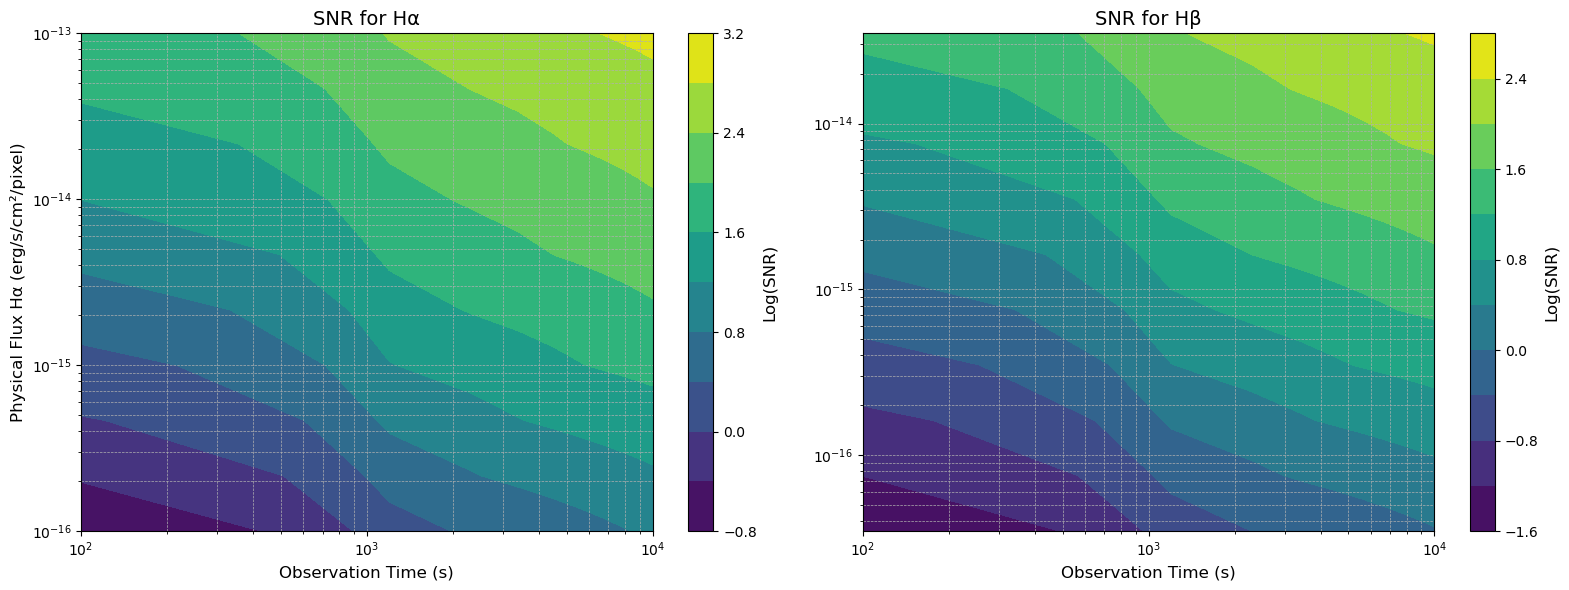

In [44]:
# Grid ranges
SB = np.logspace(-16, -13, 10)  # 10 points from 1e-17 to 1e-13
t_obs = np.linspace(100, 10000, 10)  # 10 points from 100 to 10,000 seconds
T_obs, Physical_flux_Ha = np.meshgrid(t_obs, SB)

n_pixels = 10

# Hα

Flux_Ha_pix = SB * angular_size_pixel_TOBI**2 

N_s_Ha = 10**C['Ha'] * Physical_flux_Ha / filter_width['Ha'] * T_obs * n_pixels

N_sky_Ha = 10**C['Ha'] * I_sky_Ha * n_pixels * T_obs

N_dark = Dark_current_TOBI * n_pixels * T_obs
Readout_noise = n_pixels * Readout_noise_TOBI**2

SNR_Ha = N_s_Ha / np.sqrt(N_s_Ha + N_sky_Ha + N_dark + Readout_noise)

# Hβ
Flux_Ha_pix = SB / 2.86 * angular_size_pixel_TOBI**2 

N_s_Hb = 10**C['Hb'] * Physical_flux_Hb / filter_width['Hb'] * T_obs * n_pixels

N_sky_Hb = 10**C['Hb'] * I_sky_Hb * n_pixels * T_obs

SNR_Hb = N_s_Hb / np.sqrt(N_s_Hb + N_sky_Hb + N_dark + Readout_noise)


fig, axs = plt.subplots(1, 2, figsize=(16, 6)) #sharey=True

cp_Ha = axs[0].contourf(T_obs, Physical_flux_Ha, np.log10(SNR_Ha), levels=10, cmap='viridis')
cbar_Ha = fig.colorbar(cp_Ha, ax=axs[0])
cbar_Ha.set_label('Log(SNR)', fontsize=12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Observation Time (s)', fontsize=12)
axs[0].set_ylabel('Physical Flux Hα (erg/s/cm²/pixel)', fontsize=12)
axs[0].set_title('SNR for Hα', fontsize=14)
axs[0].grid(visible=True, which="both", linestyle='--', linewidth=0.5)

cp_Hb = axs[1].contourf(T_obs, Physical_flux_Hb, np.log10(SNR_Hb), levels=10, cmap='viridis',clim=[0,3])
cbar_Hb = fig.colorbar(cp_Hb, ax=axs[1])
cbar_Hb.set_label('Log(SNR)', fontsize=12)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Observation Time (s)', fontsize=12)
axs[1].set_title('SNR for Hβ', fontsize=14)
axs[1].grid(visible=True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [53]:
### === Display Object Frames === ###

filter = ['Ha', 'Hb', 'g', 'r', 'i']
filter_cmap = {'Ha': 'hot','Hb': 'magma','g': 'bone','r': 'hot','i': 'copper'}
file_paths = {f: f'data/data_{f}_filter_28_10_24/IC5146_{f}_000.fit' for f in ['g', 'r', 'i']}

frame_obj = {}
obs_time = {}

from astropy.io import fits
for f in ['g', 'r', 'i']: 
    with fits.open(file_paths[f]) as hdul:
        frame_obj[f] = hdul[0].data 
        obs_time[f] = hdul[0].header['EXPTIME']
        #print(hdul[0].header)

for f,file in zip(['Ha','Hb'],['data/data_Ha_filter_28_10_24/IC5146_Ha_000.fit','data/data_Hb_filter_30_10_24/IC5146_Hb_1200_062.fit']): 
    with fits.open(file) as hdul:
        frame_obj[f] = hdul[0].data 
        #print(hdul[0].header)
        obs_time[f] = hdul[0].header['EXPTIME']

# convert from ADU to electrons/s
for f in filter:
        frame_obj[f] = frame_obj[f] * 0.6


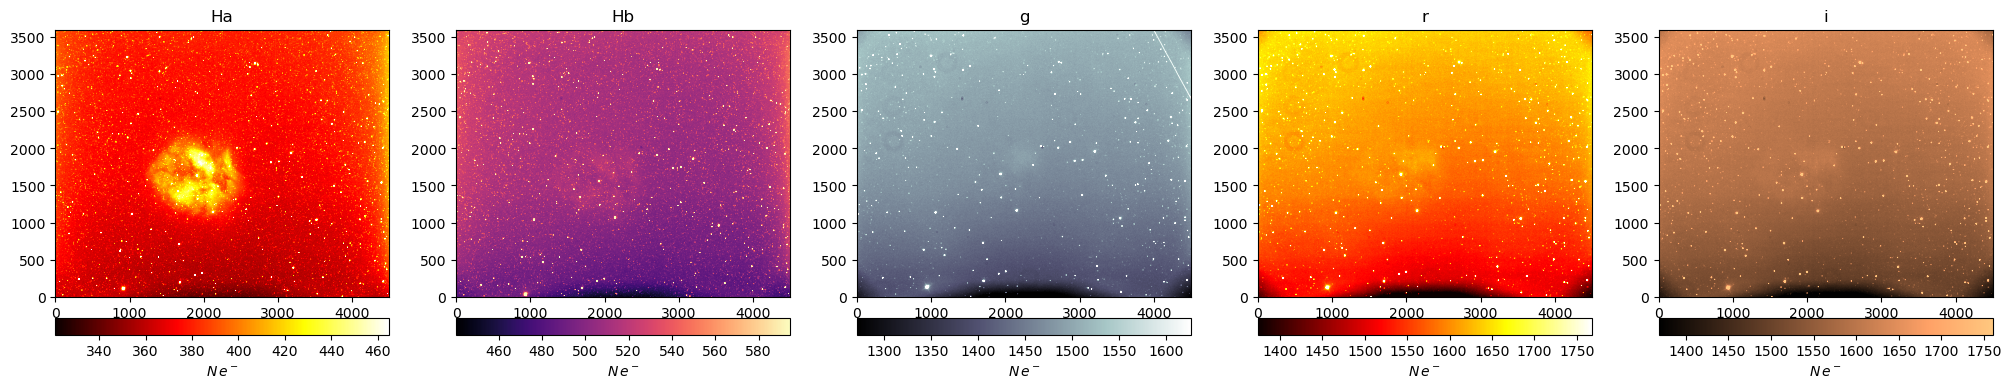

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 5.5))  
axes = axes.flatten() 

for i, f in enumerate(filter):
    im = axes[i].imshow(frame_obj[f],clim=np.quantile(frame_obj[f], [0.005, 0.995]), cmap=filter_cmap[f], origin='lower')
    plt.colorbar(im, ax=axes[i], location='bottom', fraction=0.05, pad=0.05, label="$N\, e^-$")
    axes[i].set_title(f)
    

In [57]:
# bias
print(f"Bias level is around 205")

# properties of the sky:
from astropy.stats import sigma_clipped_stats
for f in filter:
    mean_bg, median_bg, std_bg = sigma_clipped_stats(frame_obj[f], sigma=3.0)
    print(f' {f} mean background: ', mean_bg)
    print(f'{f} median backround: ', median_bg)
    print(f'{f} std background: ', std_bg)

Bias level is around 205
 Ha mean background:  374.59815777867414
Ha median backround:  373.8
Ha std background:  22.205315596155966
 Hb mean background:  507.0430694285093
Hb median backround:  507.0
Hb std background:  25.811431772259393
 g mean background:  1468.4729332505751
g median backround:  1470.6
g std background:  57.64434793954882
 r mean background:  1587.0608019879485
r median backround:  1589.3999999999999
r std background:  61.32615975139773
 i mean background:  1580.574096144726
i median backround:  1582.8
i std background:  61.13888850480811


# $H\alpha/H\beta$ ratio noise and $E(B-V)$ Signal to Noise

The **SNR of the Balmer decrement** can be written as:

$$
\text{SNR}_{H\alpha/H\beta} = \frac{\text{Signal}_{H\alpha}/\text{Signal}_{H\beta} \cdot \frac{t_{\text{obs}, H\beta}}{t_{\text{obs}, H\alpha}}}{\sqrt{\left( \frac{\text{Noise}_{H\alpha}}{\text{Signal}_{H\beta}} \right)^2 + \left( \frac{\text{Signal}_{H\alpha}}{\text{Signal}_{H\beta}^2} \cdot \text{Noise}_{H\beta} \right)^2} \cdot \sqrt{\frac{t_{\text{obs}, H\beta}}{t_{\text{obs}, H\alpha}}}}
$$

This formula combines the signals and the noise from both H$\alpha$ and H$\beta$ measurements. The need to account for different integration times becomes explicit in the noise terms. To handle the different integration times, we must scale both the signals and the noise terms accordingly. 


Reddening is defined as: 

$$E(B-V) = 1.97 \log_{10}\left( \frac{(H\alpha/H\beta)}{2.86} \right)$$

The SNR is:
$$
\text{SNR}_{E(B-V)} = \frac{1.97 \log_{10}\left( \frac{H\alpha/H\beta}{2.86} \right)}{\frac{1.97}{\ln(10)} \cdot \frac{1}{\frac{H\alpha}{H\beta}} \cdot \text{Noise}_{H\alpha/H\beta}}
$$



The SNR isn't just about the signal — it's about the balance between signal and noise. If you only increase Hα's exposure time without increasing Hβ's exposure (or at least balancing both), you're introducing more noise to the overall system without improving the Hβ measurement (which is crucial for the Balmer decrement calculation).

Increasing exposure of Hα alone doesn't improve the overall precision of the Balmer decrement (which depends on both lines). In fact, a higher exposure time for Hα increases its noise, worsening the SNR compared to a balanced exposure time between Hα and Hβ.

In [46]:

Flux_Ha_pix = 1e-15 * angular_size_pixel_TOBI**2                  # erg/s /cm^2 / pixel
Flux_Hb_pix = physical_flux_Ha_pix / 2.86


n_pixels = 10

# Ha

t_obs_Ha = 900
n_0_Ha = 1

Signal_Ha =  10**C['Ha'] * Flux_Ha_pix / filter_width['Ha'] * n_0_Ha * t_obs_Ha * n_pixels

N_sky_Ha = 10**C['Ha'] * I_sky_Ha * n_0_Ha * t_obs_Ha * n_pixels

N_dark = Dark_current_TOBI * n_0_Ha * t_obs_Ha * n_pixels 

Noise_Ha = np.sqrt(Signal_Ha + N_sky_Ha + N_dark + Readout_noise)

#######################

# Hb

t_obs_Hb = 1200
n_0_Hb = 4

Signal_Hb =  10**C['Hb'] * Flux_Hb_pix / filter_width['Hb'] * n_0_Hb * t_obs_Hb * n_pixels
   
N_sky_Hb = 10**C['Hb'] * I_sky_Hb * n_0_Hb * t_obs_Hb * n_pixels

N_dark = Dark_current_TOBI * n_0_Hb * t_obs_Hb * n_pixels # temperature dependence

Noise_Hb = np.sqrt(Signal_Hb + N_sky_Hb + N_dark + Readout_noise) 

########################

Signal_Balmer = Signal_Ha/Signal_Hb * (n_0_Hb * t_obs_Hb)/(n_0_Ha * t_obs_Ha)
Noise_Balmer = np.sqrt((Noise_Ha/Signal_Hb)**2+(-Signal_Ha/Signal_Hb**2 * Noise_Hb)**2) * np.sqrt((n_0_Hb * t_obs_Hb)/(n_0_Ha * t_obs_Ha))

Signal_EBmV = 1.97 * np.log10(Signal_Balmer/2.86)
Noise_EBmV = 1.97/np.log(10) * Noise_Balmer/Signal_Balmer

SNR_Balmer = Signal_Balmer / Noise_Balmer 
SNR_EBmV = Signal_EBmV / Noise_EBmV 

print("### Balmer Decrement SNR and E(B-V) SNR ###\n")
print(f"Signal-to-Noise Ratio for Balmer decrement : SNR = {SNR_Balmer:.2f}")
print(f"Signal-to-Noise Ratio for E(B-V) : SNR = {SNR_EBmV:.2f}")


### Balmer Decrement SNR and E(B-V) SNR ###

Signal-to-Noise Ratio for Balmer decrement : SNR = 2.58
Signal-to-Noise Ratio for E(B-V) : SNR = 2.34


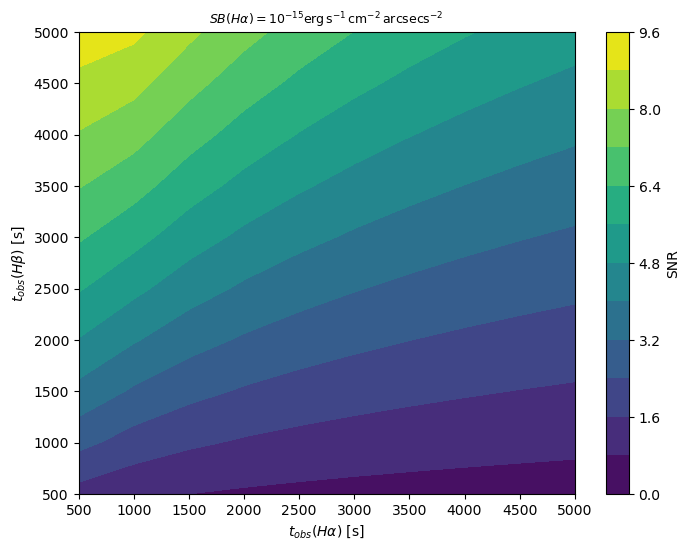

In [51]:
### === How is SNR depending on the choice of observation time, for fixed n_pixel === ###

n_pixels = 10 # Fixed n_pixels value
n_0 = 1 # Fixed n_0 value
t_obs_values = np.linspace(500, 5000, 10)

# Create arrays for SNR values
SNR_values = np.zeros((len(t_obs_values), len(t_obs_values)))

for i, t_obs_Ha in enumerate(t_obs_values):
    for j, t_obs_Hb in enumerate(t_obs_values):
        
        # Ha Calculation
        Signal_Ha =  10**C['Ha'] * Flux_Ha_pix / filter_width['Ha'] * n_0_Ha * t_obs_Ha * n_pixels
             
        N_sky_Ha = 10**C['Ha'] * I_sky_Ha * n_0_Ha * t_obs_Ha * n_pixels
        
        N_dark = Dark_current_TOBI * n_0_Ha * t_obs_Ha * n_pixels # temperature dependence
        
        Noise_Ha = np.sqrt(Signal_Ha + N_sky_Ha + N_dark + Readout_noise)

        # Hb Calculation

        Signal_Hb =  10**C['Hb'] * Flux_Hb_pix / filter_width['Hb'] * n_0_Hb * t_obs_Hb * n_pixels
            
        N_sky_Hb = 10**C['Hb'] * I_sky_Hb * n_0_Hb * t_obs_Hb * n_pixels
        
        N_dark = Dark_current_TOBI * n_0_Hb * t_obs_Hb * n_pixels # temperature dependence

        Noise_Hb = np.sqrt(Signal_Hb + N_sky_Hb + N_dark + Readout_noise) 

        # Balmer Decrement SNR Calculation
        Signal_Balmer = Signal_Ha / Signal_Hb * (n_0_Hb * t_obs_Hb)/(n_0_Ha * t_obs_Ha)
        Noise_Balmer = np.sqrt((Noise_Ha / Signal_Hb)**2 + (-Signal_Ha / Signal_Hb**2 * Noise_Hb)**2) * np.sqrt((n_0_Hb * t_obs_Hb)/(n_0_Ha * t_obs_Ha))

        Signal_EBmV = 1.97 * np.log10(Signal_Balmer/2.86)
        Noise_EBmV = 1.97/np.log(10)/2.86 * Noise_Balmer/Signal_Balmer

        SNR = Signal_EBmV / Noise_EBmV 
        SNR = Signal_Balmer / Noise_Balmer
        
        # Store the SNR value
        SNR_values[j, i] = SNR
        

# Create the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(t_obs_values, t_obs_values, SNR_values, 10, cmap='viridis')
plt.colorbar(label='SNR')
plt.title("$SB(H\\alpha) = 10^{-15} \\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, arcsecs^{-2}}$",fontsize=9)
plt.xlabel('$t_{obs} (H\\alpha)$ [s]')
plt.ylabel('$t_{obs} (H\\beta)$ [s]')
plt.show()



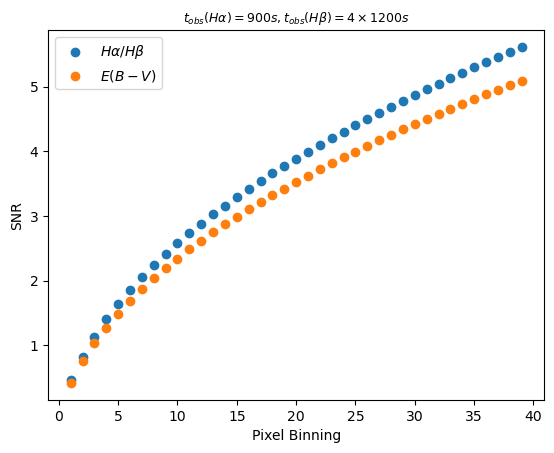

In [50]:
### === How is SNR depending on the choice of binning n_pixels, for fixed t_Hb = 5 t_Ha  === ###


t_obs_Ha = 900
n_0_Ha = 1
t_obs_Hb = 1200
n_0_Hb = 4

n_pixels = np.arange(1,40,1)

Signal_Ha =  10**C['Ha'] * Flux_Ha_pix / filter_width['Ha'] * n_0_Ha * t_obs_Ha * n_pixels
N_sky_Ha = 10**C['Ha'] * I_sky_Ha * n_0_Ha * t_obs_Ha * n_pixels
N_dark = Dark_current_TOBI * n_0_Ha * t_obs_Ha * n_pixels 
Noise_Ha = np.sqrt(Signal_Ha + N_sky_Ha + N_dark + Readout_noise)

Signal_Hb =  10**C['Hb'] * Flux_Hb_pix / filter_width['Hb'] * n_0_Hb * t_obs_Hb * n_pixels
N_sky_Hb = 10**C['Hb'] * I_sky_Hb * n_0_Hb * t_obs_Hb * n_pixels
N_dark = Dark_current_TOBI * n_0_Hb * t_obs_Hb * n_pixels 
Noise_Hb = np.sqrt(Signal_Hb + N_sky_Hb + N_dark + Readout_noise) 

Signal_Balmer = Signal_Ha/Signal_Hb * (n_0_Hb * t_obs_Hb)/(n_0_Ha * t_obs_Ha)
Noise_Balmer = np.sqrt((Noise_Ha/Signal_Hb)**2+(-Signal_Ha/Signal_Hb**2 * Noise_Hb)**2) * np.sqrt((n_0_Hb * t_obs_Hb)/(n_0_Ha * t_obs_Ha))


Signal_EBmV = 1.97 * np.log10(Signal_Balmer/2.86)
Noise_EBmV = 1.97/np.log(10) * Noise_Balmer/Signal_Balmer

SNR_Balmer = Signal_Balmer / Noise_Balmer 
SNR_EBmV = Signal_EBmV / Noise_EBmV 



plt.scatter(n_pixels,SNR_Balmer,label="$H\\alpha/H\\beta$")
plt.scatter(n_pixels,SNR_EBmV,label="$E(B-V)$")

plt.title("$t_{obs}(H\\alpha) = 900 s, t_{obs}(H\\beta) = 4 \\times 1200 s$",fontsize=9)
plt.xlabel("Pixel Binning")
plt.ylabel("SNR")
plt.legend()
plt.show()